In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("All libraries imported successfully ✅")


All libraries imported successfully ✅


In [6]:
# Replace with your actual file name
df = pd.read_csv("Superstore_Sales.csv")

# Show first 5 rows
df.head()


,Order Date,Region,Category,Sales,Profit
0,01-01-2020,East,Furniture,200,20
1,16-01-2020,West,Technology,450,80
2,31-01-2020,Central,Office Supplies,120,10
3,15-02-2020,South,Technology,300,50
4,01-03-2020,East,Furniture,500,90


In [7]:
# Check shape of data (rows, columns)
df.shape  

# Check column data types and nulls
df.info()

# Check summary statistics
df.describe()

# Check missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Order Date  20 non-null     object
 1   Region      20 non-null     object
 2   Category    20 non-null     object
 3   Sales       20 non-null     int64 
 4   Profit      20 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 932.0+ bytes


Order Date    0
Region        0
Category      0
Sales         0
Profit        0
dtype: int64

In [8]:
# Profit by category
category_profit = df.groupby("Category")["Profit"].sum().reset_index()
print("Profit by Category:\n", category_profit)

# Profit by region
region_profit = df.groupby("Region")["Profit"].sum().reset_index()
print("\nProfit by Region:\n", region_profit)


Profit by Category:
           Category  Profit
0        Furniture     525
1  Office Supplies     122
2       Technology     393

Profit by Region:
     Region  Profit
0  Central     228
1     East     280
2    South     267
3     West     265


In [9]:
# Add a Profit Margin column
df["Profit Margin"] = (df["Profit"] / df["Sales"]) * 100

# Average margin by Category
category_margin = df.groupby("Category")["Profit Margin"].mean().reset_index()
print("Average Profit Margin by Category:\n", category_margin)

# Average margin by Region
region_margin = df.groupby("Region")["Profit Margin"].mean().reset_index()
print("\nAverage Profit Margin by Region:\n", region_margin)


Average Profit Margin by Category:
           Category  Profit Margin
0        Furniture      15.013769
1  Office Supplies      11.403891
2       Technology      14.262916

Average Profit Margin by Region:
     Region  Profit Margin
0  Central      13.354368
1     East      14.078424
2    South      14.931839
3     West      13.601177


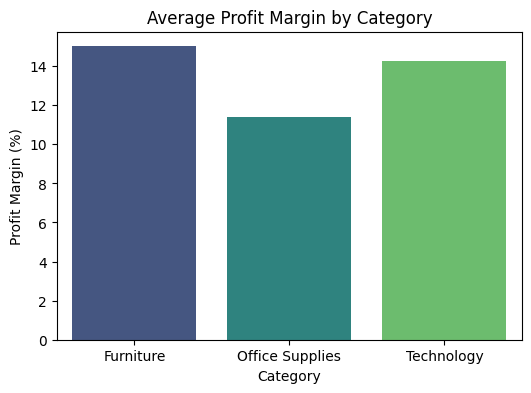

In [11]:
plt.figure(figsize=(6,4))
sns.barplot(data=category_margin, x="Category", y="Profit Margin", hue="Category", palette="viridis", legend=False)
plt.title("Average Profit Margin by Category")
plt.ylabel("Profit Margin (%)")
plt.show()


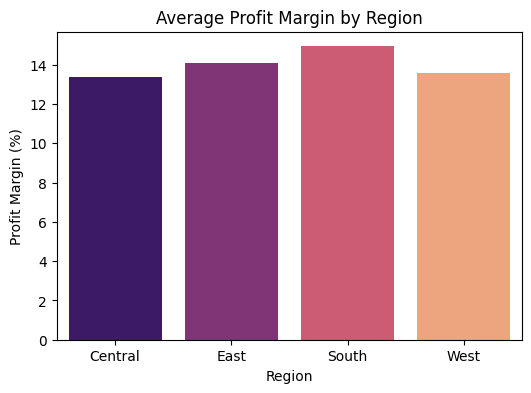

In [12]:
# Average margin by Region
region_margin = df.groupby("Region")["Profit Margin"].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=region_margin, x="Region", y="Profit Margin", hue="Region", palette="magma", legend=False)
plt.title("Average Profit Margin by Region")
plt.ylabel("Profit Margin (%)")
plt.show()


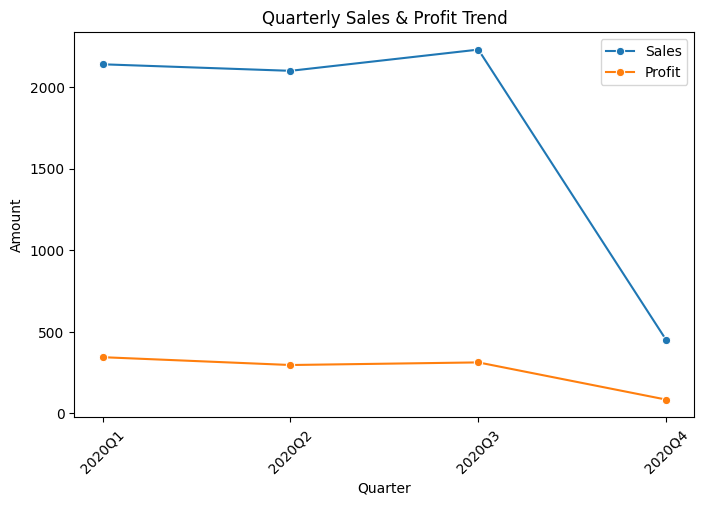

In [14]:
# Convert Order Date to datetime
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True)

# Extract Year and Quarter
df["Quarter"] = df["Order Date"].dt.to_period("Q").astype(str)  # <-- convert to string

# Quarterly Sales & Profit
quarterly_trend = df.groupby("Quarter")[["Sales", "Profit"]].sum().reset_index()

# Plot
plt.figure(figsize=(8,5))
sns.lineplot(data=quarterly_trend, x="Quarter", y="Sales", marker="o", label="Sales")
sns.lineplot(data=quarterly_trend, x="Quarter", y="Profit", marker="o", label="Profit")
plt.title("Quarterly Sales & Profit Trend")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.legend()
plt.show()


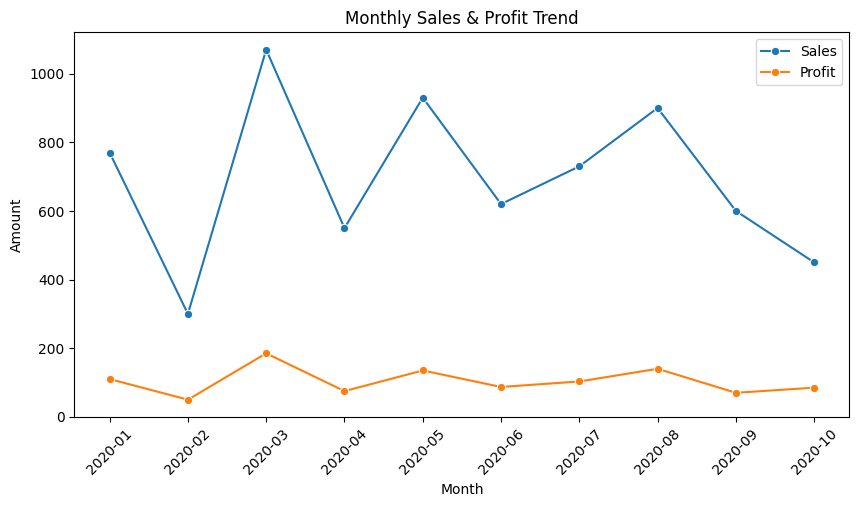

In [15]:
# Extract Year-Month
df["Month"] = df["Order Date"].dt.to_period("M").astype(str)

# Monthly Sales & Profit
monthly_trend = df.groupby("Month")[["Sales", "Profit"]].sum().reset_index()

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_trend, x="Month", y="Sales", marker="o", label="Sales")
sns.lineplot(data=monthly_trend, x="Month", y="Profit", marker="o", label="Profit")
plt.title("Monthly Sales & Profit Trend")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.legend()
plt.show()


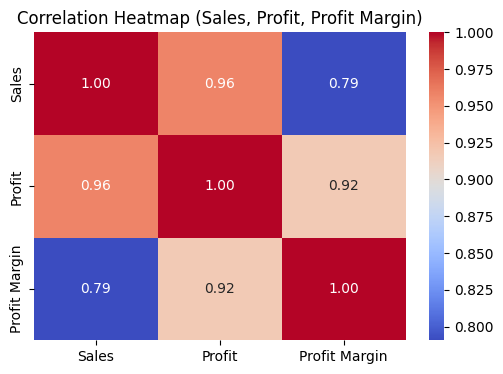

In [16]:
# Select numeric columns for correlation
corr = df[["Sales", "Profit", "Profit Margin"]].corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Sales, Profit, Profit Margin)")
plt.show()


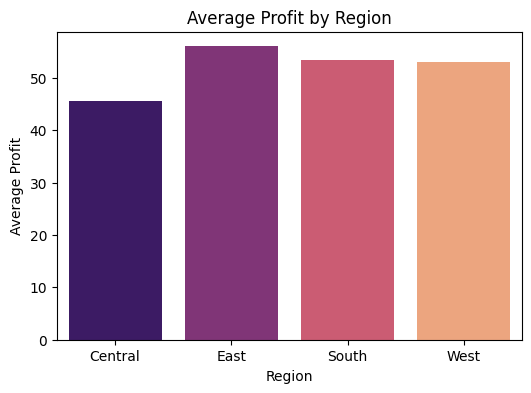

,Region,Profit
0,Central,45.6
1,East,56.0
2,South,53.4
3,West,53.0


In [17]:
# Average profit by Region
region_profit = df.groupby("Region")["Profit"].mean().reset_index()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(data=region_profit, x="Region", y="Profit", hue="Region", palette="magma", legend=False)
plt.title("Average Profit by Region")
plt.ylabel("Average Profit")
plt.show()

# Show table also
region_profit


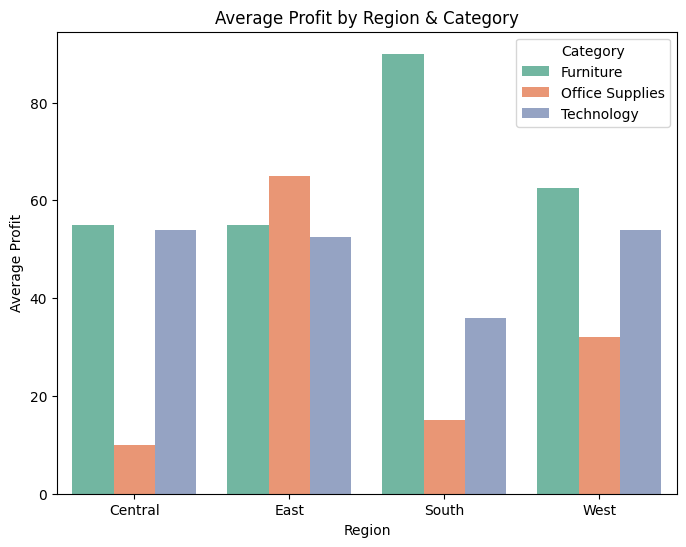

,Region,Category,Profit
0,Central,Furniture,55.0
1,Central,Office Supplies,10.0
2,Central,Technology,54.0
3,East,Furniture,55.0
4,East,Office Supplies,65.0
5,East,Technology,52.5
6,South,Furniture,90.0
7,South,Office Supplies,15.0
8,South,Technology,36.0
9,West,Furniture,62.5


In [18]:
# Average Profit by Region and Category
region_category_profit = df.groupby(["Region", "Category"])["Profit"].mean().reset_index()

# Plot
plt.figure(figsize=(8,6))
sns.barplot(data=region_category_profit, x="Region", y="Profit", hue="Category", palette="Set2")
plt.title("Average Profit by Region & Category")
plt.ylabel("Average Profit")
plt.show()

# Show table also
region_category_profit


In [19]:
# Find the (Region, Category) pair with highest profit
top_pair = region_category_profit.loc[region_category_profit["Profit"].idxmax()]

print("🔥 Top Performing Pair:")
print(f"Region: {top_pair['Region']}, Category: {top_pair['Category']}, Average Profit: {top_pair['Profit']:.2f}")


🔥 Top Performing Pair:
Region: South, Category: Furniture, Average Profit: 90.00


In [20]:
# Best performing Region-Category pair (highest profit)
top_pair = region_category_profit.loc[region_category_profit["Profit"].idxmax()]

# Worst performing Region-Category pair (lowest profit)
worst_pair = region_category_profit.loc[region_category_profit["Profit"].idxmin()]

print("🔥 Top Performing Pair:")
print(f"Region: {top_pair['Region']}, Category: {top_pair['Category']}, Average Profit: {top_pair['Profit']:.2f}")

print("\n⚠️ Worst Performing Pair:")
print(f"Region: {worst_pair['Region']}, Category: {worst_pair['Category']}, Average Profit: {worst_pair['Profit']:.2f}")


🔥 Top Performing Pair:
Region: South, Category: Furniture, Average Profit: 90.00

⚠️ Worst Performing Pair:
Region: Central, Category: Office Supplies, Average Profit: 10.00


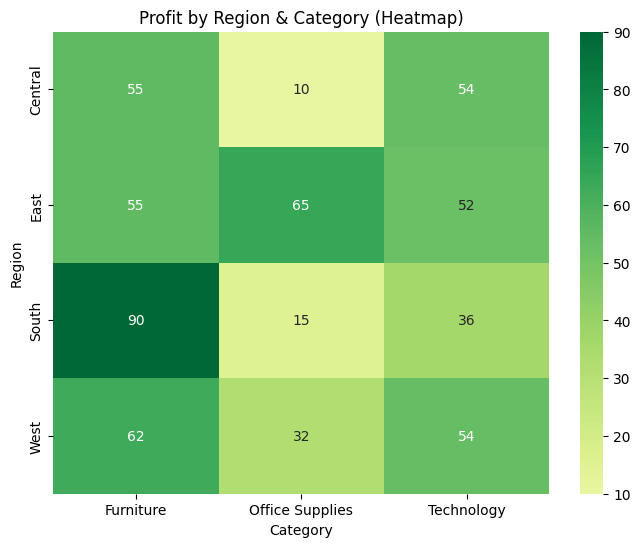

In [21]:
# Create a pivot table for Region vs Category Profit
pivot_table = region_category_profit.pivot(index="Region", columns="Category", values="Profit")

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="RdYlGn", center=0)

plt.title("Profit by Region & Category (Heatmap)")
plt.ylabel("Region")
plt.xlabel("Category")
plt.show()


In [22]:
# Simulate Inventory Days (random values for demo)
np.random.seed(42)  # for reproducibility
df["Inventory_Days"] = np.random.randint(10, 90, size=len(df))

# Preview
df.head()


,Order Date,Region,Category,Sales,Profit,Profit Margin,Quarter,Month,Inventory_Days
0,2020-01-01,East,Furniture,200,20,10.000000,2020Q1,2020-01,61
1,2020-01-16,West,Technology,450,80,17.777778,2020Q1,2020-01,24
2,2020-01-31,Central,Office Supplies,120,10,8.333333,2020Q1,2020-01,81
3,2020-02-15,South,Technology,300,50,16.666667,2020Q1,2020-02,70
4,2020-03-01,East,Furniture,500,90,18.000000,2020Q1,2020-03,30


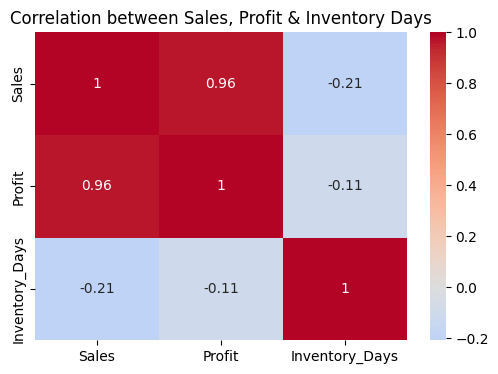

In [23]:
# Correlation matrix
corr = df[["Sales", "Profit", "Inventory_Days"]].corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation between Sales, Profit & Inventory Days")
plt.show()


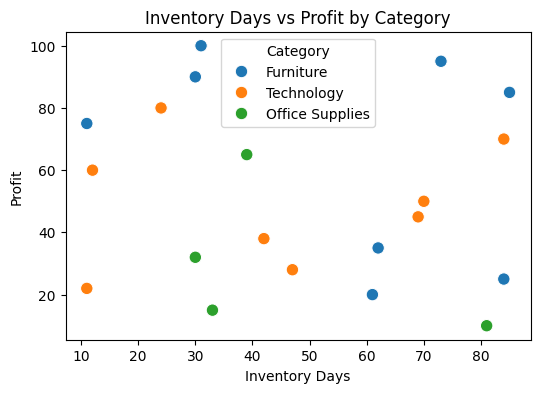

In [24]:
# Scatter plot: Inventory Days vs Profit
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Inventory_Days", y="Profit", hue="Category", s=80)
plt.title("Inventory Days vs Profit by Category")
plt.xlabel("Inventory Days")
plt.ylabel("Profit")
plt.legend(title="Category")
plt.show()
